In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

randn = np.random.randn

In [6]:
data = pd.read_csv('Exporte/Tagesverkauf.csv', decimal=",", sep=";")

In [7]:
del data['Unnamed: 5']
del data['Time (Day)']
data.insert(0, 'Date', pd.Series(pd.date_range(start='1995-01-01', end='2015-07-15')))

In [8]:
print(data[:5])
print('...')

        Date  ProduktA  ProduktB  ProduktC  ProduktD
0 1995-01-01   1100.00   1000.00   1875.00   2850.00
1 1995-01-02   1164.59   2500.00   2940.35   3264.21
2 1995-01-03   1021.10   2410.34   1962.06   2677.24
3 1995-01-04   1047.17   2439.96   2139.77   2783.86
4 1995-01-05   1202.09   2616.01   3196.04   3417.62
...


In [9]:
xxx = np.arange(len(data))
# simple seasonal multiplier - based on sine fn
multiplier = 0.05 * np.sin((1/183) * np.pi * xxx - 2) + 1
# del data.PAseasonal
data.insert(2, "PAseasonal", data.ProduktA * multiplier)

In [10]:
print(data[:5])
print('...')

        Date  ProduktA   PAseasonal  ProduktB  ProduktC  ProduktD
0 1995-01-01   1100.00  1049.988642   1000.00   1875.00   2850.00
1 1995-01-02   1164.59  1111.233893   2500.00   2940.35   3264.21
2 1995-01-03   1021.10   973.973844   2410.34   1962.06   2677.24
3 1995-01-04   1047.17   998.502015   2439.96   2139.77   2783.86
4 1995-01-05   1202.09  1145.849725   2616.01   3196.04   3417.62
...


Comparison: initial ProduktA data vs. seasonally adjusted data over a one year time span.

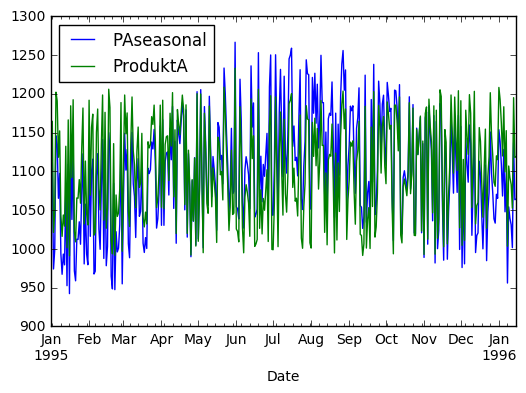

In [11]:
first_year = data[:380].set_index(data.Date[:380])
first_year.plot('Date', ['PAseasonal', 'ProduktA'])

First four years of ProduktA data with monthly averages for smoother plot.
Better to see the introduced seasonal effect here.

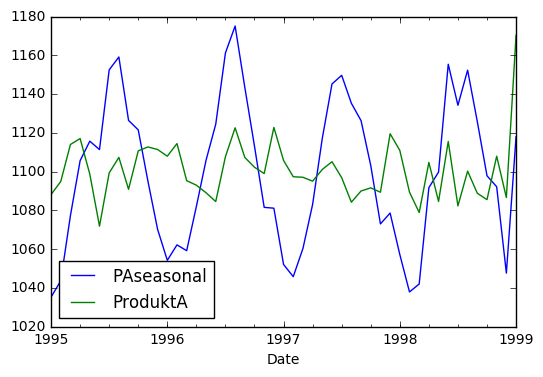

In [12]:
four_years = data[:(4*366)].set_index(data.Date[:(4*366)])
four_years = four_years.resample('M').mean()
four_years.plot(y=['PAseasonal', 'ProduktA'])

(900, 3300)

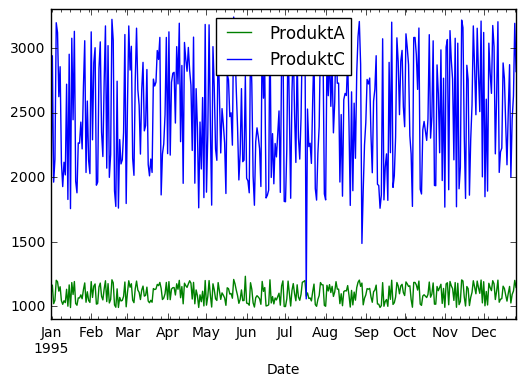

In [13]:
ax = data[:360].plot(x='Date', y=['ProduktA', 'ProduktC'], color=['g', 'b'])
ax.set_ylim(900, 3300)

(2200, 3400)

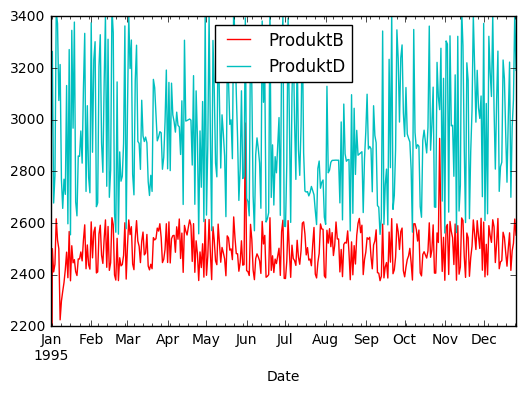

In [14]:
ax = data[:360].plot(x='Date', y=['ProduktB', 'ProduktD'], color=['r', 'c'])
ax.set_ylim(2200, 3400)

In [15]:
df = data.set_index(data.Date)

In [16]:
# take quarterly average for smoother plot
df = df.resample('Q').mean()

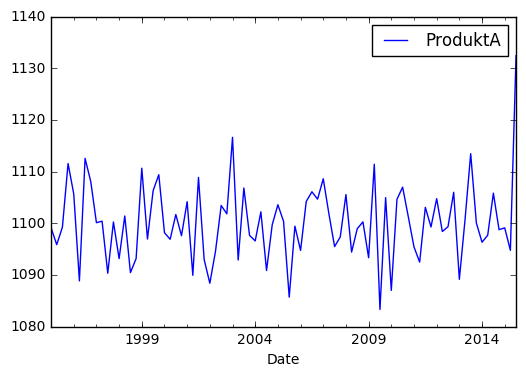

In [17]:
ax = df[:360].plot(y='ProduktA')
# ax.set_ylim(2200, 3400)

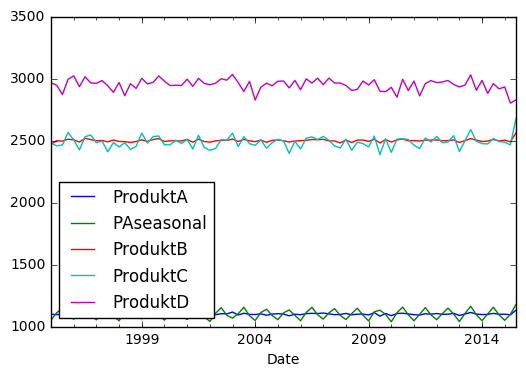

In [18]:
yy = np.sin(df)
df.plot()

In [19]:
xxx = np.arange(len(df))
# simple seasonal multiplier - based on sine fn
multiplier = 0.05 * np.sin(0.5 * np.pi * xxx - 2) + 1
# del df['PA-adjusted']
df.insert(4, "PA-adjusted", df.ProduktA * multiplier)

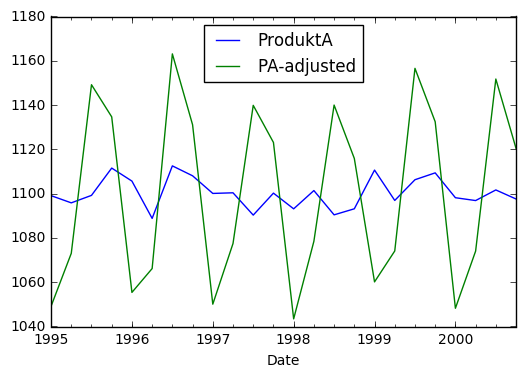

In [20]:
# df.plot(x=df.index, y='PA-adjusted')
df = df[:24]
df.plot(df.index, ['ProduktA', 'PA-adjusted'])
# plt.plot(xxx, multiplier)